# Cleaning Movie Dataset
#### - MOHAN BAKSHI


In [16]:
# importing libraries

import pandas as pd
import numpy as np
import re

# For date time manipulation
import datetime

# For data visualisations
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Reading the movie csv data
data = pd.read_csv("Datasets/movie.csv")

In [5]:
# checking first 5 records

data.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [14]:
# Checking null values records in the data

data.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

As per the result, our data is clean, it doesn't have any null records available.

However, After observing the record closely, we can deduce:
- Title column has year in it.
- Genres column has multiple genres in string formate separated through |.

In [19]:
# Using Regex, extracting year from title.
def split_title_year(title):
    match = re.match(r'^(.*)\s\((\d{4})\)$', title)
    if match:
        return match.group(1), match.group(2)
    else:
        return title, None

data[['title', 'year']] = data['title'].apply(lambda x: pd.Series(split_title_year(x)))

data.head(5)

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995


In [20]:
# Converting the Genres into list

data['genres'] = data['genres'].str.split('|')

data.head(5)

,movieId,title,genres,year
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995
2,3,Grumpier Old Men,"[Comedy, Romance]",1995
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995
4,5,Father of the Bride Part II,[Comedy],1995


# Data Visualization

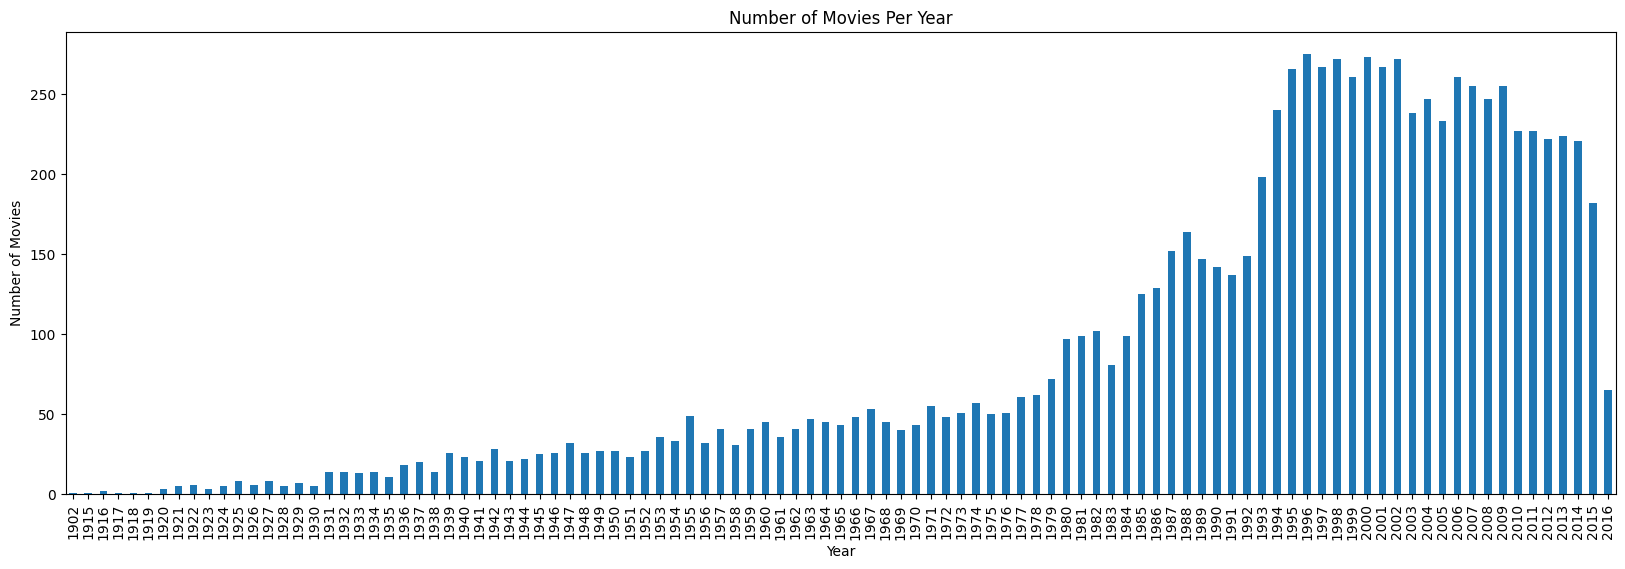

In [25]:
df_year_count = data['year'].value_counts().sort_index()

plt.figure(figsize=(20, 6))
df_year_count.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Per Year')
plt.show()

### Observation based on the Bar chart

* Early Years (1902-1950s):

The number of movies produced each year was relatively low, with only a handful of movies produced annually.
The production volume started to pick up gradually around the 1930s and 1940s.

* Growth Period (1950s-1980s):

There is a noticeable increase in the number of movies produced per year starting from the mid-1950s.
This growth continued steadily through the 1960s and 1970s, indicating a rising trend in movie production.

* Peak Production (1980s-2000s):

A significant surge in movie production is observed from the late 1980s, with a peak around the late 1990s and early 2000s.
The highest number of movies produced in a single year exceeds 250.

* Recent Trends (2000s-2016):

After reaching the peak, the number of movies produced annually shows some fluctuations but generally remains high through the 2000s.
There is a slight decline observed starting from around 2010 onwards, with a notable drop in production by 2016.

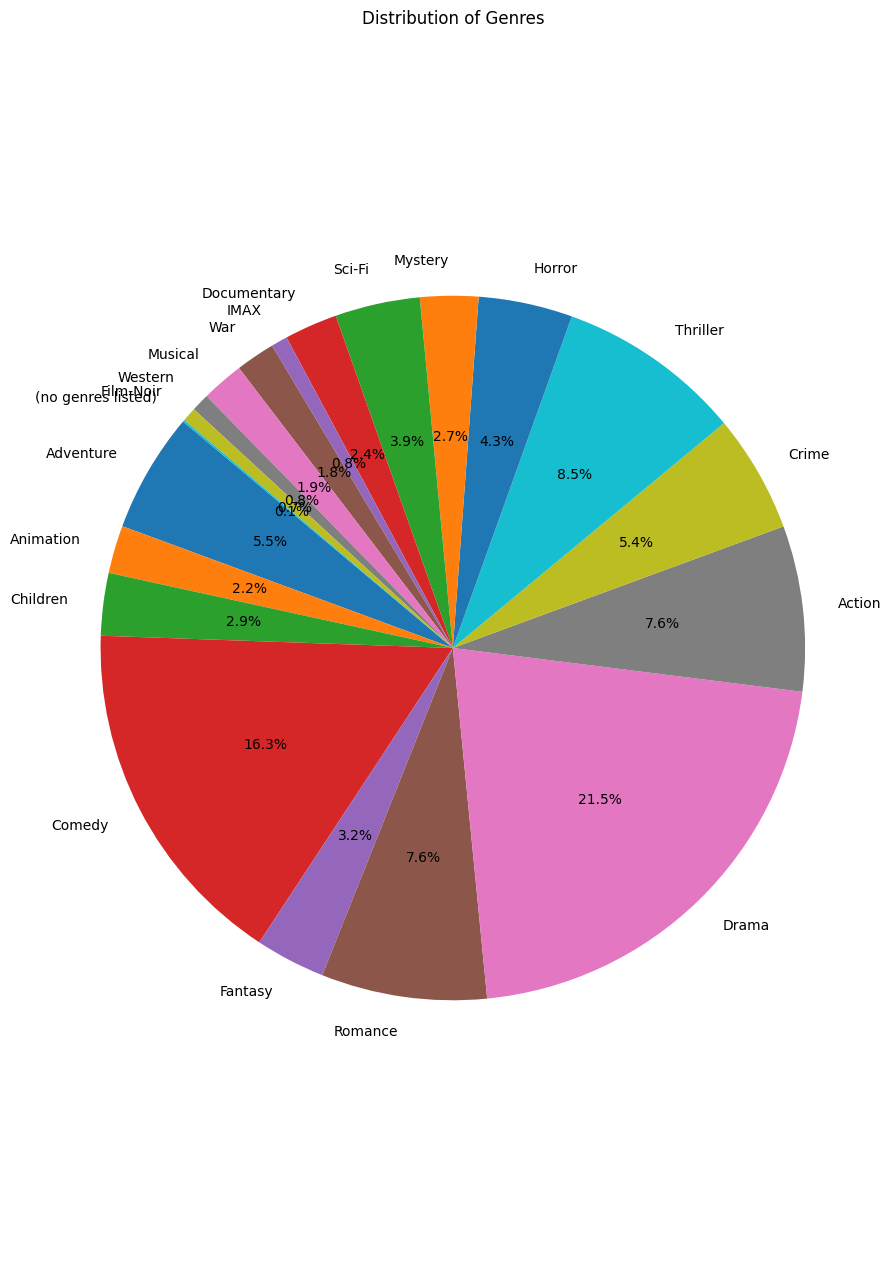

In [36]:
from collections import Counter

# Flatten the list of genres
all_genres = [genre for sublist in data['genres'] for genre in sublist]
genre_counts = Counter(all_genres)


# Plotting the pie chart
plt.figure(figsize=(10, 16))
plt.pie(genre_counts.values(), labels=genre_counts.keys(), autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Genres')
plt.show()

### Distribution of Genres

*Dominant Genres*: Drama (21.5%) and Comedy (16.3%) are the most common genres, making up a significant portion of the dataset. These genres are popular and versatile, appealing to a wide audience.

*Variety of Genres*: The dataset includes a wide variety of genres, showing the diversity in the types of movies produced. Genres like Action (8.5%), Crime (5.4%), and Thriller (4.3%) also have substantial representation.

*Less Common Genres*: Genres like Musical (0.9%), Western (0.8%), and IMAX (0.2%) are less common, indicating they are niche markets.